In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go

cf.go_offline(connected= True)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from IPython.display import Image 

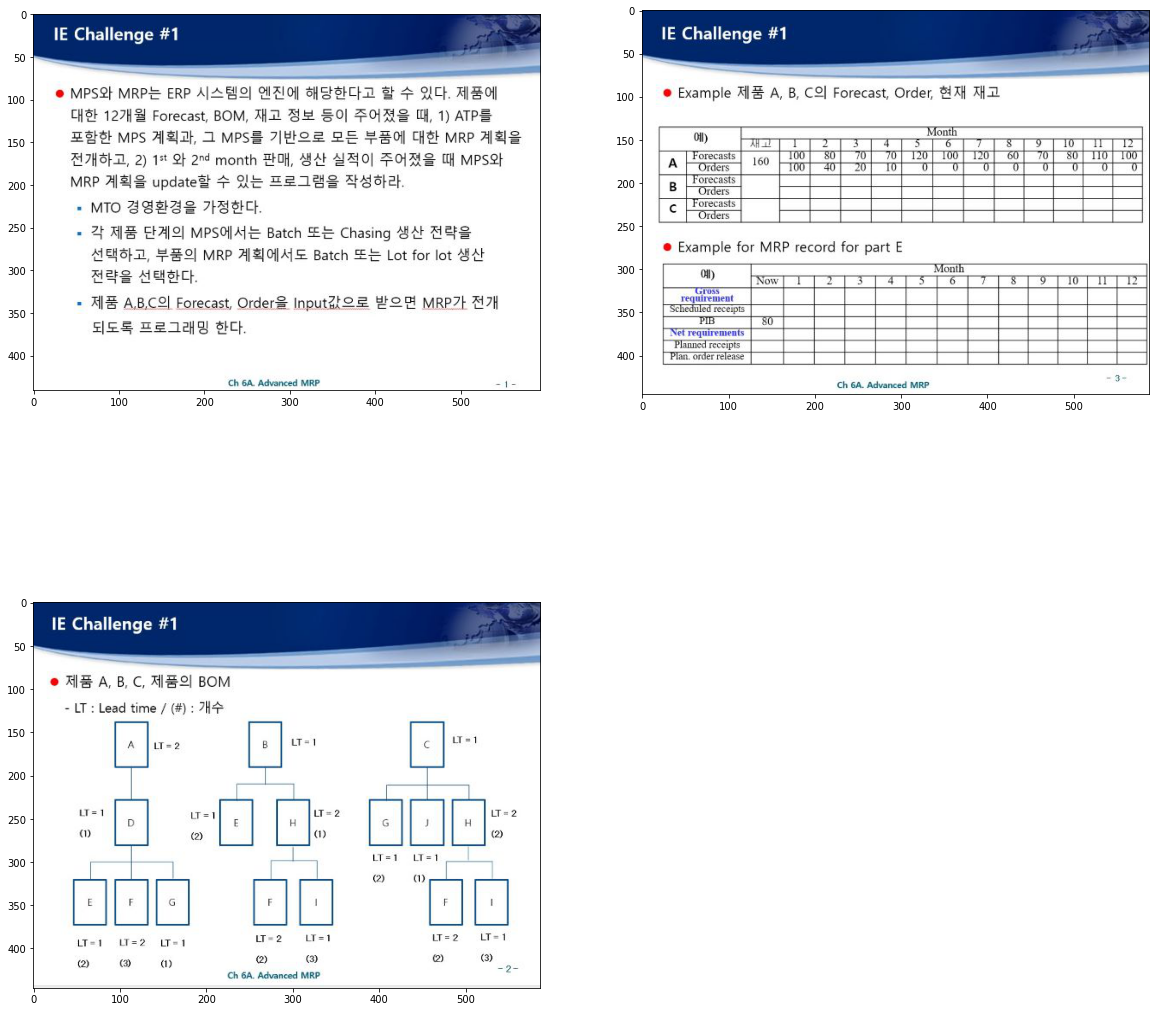

In [31]:
from plotly.subplots import make_subplots
import matplotlib.pylab as plt
from PIL import Image

img_file1 = 'data0.jpg'
img_file2 = "data.jpg"
img_file3 = "data1.jpg"

img1 = Image.open(img_file1).convert('RGB')
img2 = Image.open(img_file2).convert('RGB')
img3 = Image.open(img_file3).convert('RGB')

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img3)


plt.show()


## BOM을 직관적으로 알 수 있게 시각화 하였다.

In [5]:
# 첫 번째 방식 ; 구조적으로는 이해가 가나, 실제로는 직관적이지 않다. (pyprnt 사용시)
# pprint 사용 시 나아진 것을 확인할 수 있다.
bom = {'A': {'#':1, 'LT':2,'comp':
             {'D' : {'#':1, 'LT':1, 'comp':{
             'E' : {'#':2, 'LT':2, 'comp':{}}, 'F':{'#':3, 'LT':2,'comp': {}}, 'G':{'#':1, 'LT':1,'comp': {}}}}}}}

In [6]:
# 두 번째 ; 직관적으로 이해가 가능하다 but 접근은??
bom_A = {'A': {'#':1, 'LT':2,'comp':
               {'D' : {'#':1, 'LT':1, 'comp':
                       { 'E' : {'#':2, 'LT':2, 'comp':{}}, 'F':{'#':3, 'LT':2,'comp': {}}, 'G':{'#':1, 'LT':1,'comp': {}}}}}}}

bom_B = {'B': {'#':1, 'LT':2,'comp':{
                'E' : {'#':1, 'LT':1, 'comp':{}}, 'H' : {'#':1, 'LT':1, 'comp':{
                    'F' : {'#':2, 'LT':2, 'comp':{}}, 'I':{'#':3, 'LT':1,'comp': {}}}}}}}

bom_C = {'C': {'#':1, 'LT':1,'comp':
               {'G' : {'#':2, 'LT':1, 'comp':{}} ,'J' : {'#':1, 'LT':1, 'comp':{}}, 'H' : {'#':2, 'LT':2, 'comp':
                                                                                           {'F' : {'#':2, 'LT':2, 'comp':{}},'I' : {'#':3, 'LT':2, 'comp':{}}  }}}}}



In [7]:
import pprint

pprint.pprint(bom_A)
pprint.pprint(bom_B)
pprint.pprint(bom_C)

{'A': {'#': 1,
       'LT': 2,
       'comp': {'D': {'#': 1,
                      'LT': 1,
                      'comp': {'E': {'#': 2, 'LT': 2, 'comp': {}},
                               'F': {'#': 3, 'LT': 2, 'comp': {}},
                               'G': {'#': 1, 'LT': 1, 'comp': {}}}}}}}
{'B': {'#': 1,
       'LT': 2,
       'comp': {'E': {'#': 1, 'LT': 1, 'comp': {}},
                'H': {'#': 1,
                      'LT': 1,
                      'comp': {'F': {'#': 2, 'LT': 2, 'comp': {}},
                               'I': {'#': 3, 'LT': 1, 'comp': {}}}}}}}
{'C': {'#': 1,
       'LT': 1,
       'comp': {'G': {'#': 2, 'LT': 1, 'comp': {}},
                'H': {'#': 2,
                      'LT': 2,
                      'comp': {'F': {'#': 2, 'LT': 2, 'comp': {}},
                               'I': {'#': 3, 'LT': 2, 'comp': {}}}},
                'J': {'#': 1, 'LT': 1, 'comp': {}}}}}


In [8]:
# 두 번째 ; 직관적으로 이해가 가능하다 but 접근은??
bom_A = {'A': {'#':1, 'LT':2,'COMP':{'D'}} , 
           'D' : {'#':1, 'LT':1, 'COMP':{'E','F','G'}} ,
              'E' : {'#':2, 'LT':2, 'COMP':{}}, 'F':{'#':3, 'LT':2,'COMP': {}}, 'G':{'#':1, 'LT':1,'COMP': {}} }

bom_B = {'B': {'#':1, 'LT':2,'COMP':{'E', 'H'}} , 
           'E' : {'#':1, 'LT':1, 'COMP':{}}, 'H' : {'#':1, 'LT':1, 'COMP':{'F','I'}},
              'F' : {'#':2, 'LT':2, 'COMP':{}}, 'I':{'#':3, 'LT':1,'COMP': {}} }

bom_C = {'C': {'#':1, 'LT':1,'COMP':{'G','J','H'}} , 
           'G' : {'#':2, 'LT':1, 'COMP':{}} ,'J' : {'#':1, 'LT':1, 'COMP':{}}, 'H' : {'#':2, 'LT':2, 'COMP':{'F', 'I'}},
              'F' : {'#':2, 'LT':2, 'COMP':{}},'I' : {'#':3, 'LT':2, 'COMP':{}}  }
    


In [9]:
# from pyprnt import prnt
# prnt(bom)

In [10]:
# 두 번째 ; 직관적으로 이해가 가능하다 but 접근은??
bom_A = {'A': {'#':1, 'LT':2,'COMP':{'D'}} , 
           'D' : {'#':1, 'LT':1, 'COMP':{'E','F','G'}} ,
              'E' : {'#':2, 'LT':2, 'COMP':{}}, 'F':{'#':3, 'LT':2,'COMP': {}}, 'G':{'#':1, 'LT':1,'COMP': {}} }

bom_B = {'B': {'#':1, 'LT':2,'COMP':{'E', 'H'}} , 
           'E' : {'#':1, 'LT':1, 'COMP':{}}, 'H' : {'#':1, 'LT':1, 'COMP':{'F','I'}},
              'F' : {'#':2, 'LT':2, 'COMP':{}}, 'I':{'#':3, 'LT':1,'COMP': {}} }

bom_C = {'C': {'#':1, 'LT':1,'COMP':{'G','J','H'}} , 
           'G' : {'#':2, 'LT':1, 'COMP':{}} ,'J' : {'#':1, 'LT':1, 'COMP':{}}, 'H' : {'#':2, 'LT':2, 'COMP':{'F', 'I'}},
              'F' : {'#':2, 'LT':2, 'COMP':{}},'I' : {'#':3, 'LT':2, 'COMP':{}}  }
    


In [11]:
from pyprnt import prnt
prnt(bom_C,flush= True)

╭─┬──────────────────────╮
│C│╭────┬───────────────╮│
│ ││#   │1              ││
│ ││LT  │1              ││
│ ││COMP│{'G', 'H', 'J'}││
│ │╰────┴───────────────╯│
│G│╭────┬──╮             │
│ ││#   │2 │             │
│ ││LT  │1 │             │
│ ││COMP│{}│             │
│ │╰────┴──╯             │
│J│╭────┬──╮             │
│ ││#   │1 │             │
│ ││LT  │1 │             │
│ ││COMP│{}│             │
│ │╰────┴──╯             │
│H│╭────┬──────────╮     │
│ ││#   │2         │     │
│ ││LT  │2         │     │
│ ││COMP│{'I', 'F'}│     │
│ │╰────┴──────────╯     │
│F│╭────┬──╮             │
│ ││#   │2 │             │
│ ││LT  │2 │             │
│ ││COMP│{}│             │
│ │╰────┴──╯             │
│I│╭────┬──╮             │
│ ││#   │3 │             │
│ ││LT  │2 │             │
│ ││COMP│{}│             │
│ │╰────┴──╯             │
╰─┴──────────────────────╯


- BOM(Bill of Material)은 한국어로 '자재명세서'라고도 합니다. 제품을 생산하는데 소요되는 원재료 또는 부분품에 대한 상세내역입니다. BOM은 한번 만들고 끝나는 것이 아니라 제품의 생성부터 폐기까지 제품정보와 속성을 공유하고 지속적으로 관리해야 하죠.


- MPS :주일정계획(master production schedule: MPS): 주(週) 또는 일(日)별로, 생산되어야 할 구체적인 제품 또는 제품군의 양을 명시한 것.


- ATP(Available to Promise)는 비즈니스가 보유하고 있고 판매할 준비가 되어 있고 기존 고객 주문에 할당되지 않은 예상 재고량입니다.


- MTO (make to order), 주문생산/다품종 소량 생산 
    고객의 특정 주문과 니즈에 따라 주문을 받은 후에 원자재 가공, 반제품 생산 및 완제품 조립이 이루어지는 형태
    
    
- MRP는 최종제품의 완성일을 기준으로 각종 소요자재를 언제 얼마만큼 주문해야하는 것을 결정하고 필요한 자재를 사용 전에 준비시켜 재고관리와 납기통제를 최소의 비용으로 동시에 완수하려는 기법이다.


- Chasing Demand : 시장이 설정한 수요를 추적한다는 개념을 나타냅니다.

## 일단 예시를 기준으로 진행하여 보자.  - Chasing 생산방식으로 진행.

In [12]:
# 리스트를 딕셔너리로 바꾸는 과정을 함수화.
def make_dict(lst):
    lst_dict = {}
    for i,j in enumerate(lst):
        lst_dict[i+1] = j
    return lst_dict

In [13]:
# 입력 정보 (12개월 데이터)

# 12개월 forecast
forecast = [int(i) for i in '100	80	70	70	120	100	120	60	70	80	110	100'.split('\t')]

# 12개월 order
order = [int(i) for i in '100	40	20	10	0	0	0	0	0	0	0	0'.split('\t')]


#12 개월 업데이트 시킬 데이터; 모두 0으로 기초 값 설정
PAB = [0] * 12
ATP = [0] * 12
MPS_scheduled = [0] * 12
MPS_release = [0] * 12


forecast_dict = make_dict(forecast)
order_dict = make_dict(order)   
PAB_dict = make_dict(PAB)
ATP_dict= make_dict(ATP)
MPS_scheduled_dict = make_dict(MPS_scheduled)
MPS_release_dict = make_dict(MPS_release)

    
    
# 모두 dictionary로 바꿈

In [14]:
PAB_dict

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [15]:
df1 = pd.DataFrame(forecast_dict.values(),index = forecast_dict.keys(),columns = ['Forecast']).T
df2 = pd.DataFrame(order_dict.values(),index = order_dict.keys(),columns = ['Order']).T
df3 = pd.DataFrame(PAB_dict.values(),index = PAB_dict.keys(),columns = ['PAB']).T
df4 = pd.DataFrame(ATP_dict.values(),index = ATP_dict.keys(),columns = ['ATP']).T
df6 = pd.DataFrame(MPS_scheduled_dict.values(),index = MPS_scheduled_dict.keys(),columns = ['MPS_scheduled']).T
df5 = pd.DataFrame(MPS_release_dict.values(),index = MPS_release_dict.keys(),columns = ['MPS_release']).T


df = pd.concat([df1,df2,df3,df4,df5,df6])

In [16]:
df[0] = 0

In [17]:
df = df.T.sort_index().T

In [18]:
df.loc['PAB',0] = 160

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# ATP 업데이트 함수
def product_ATP(df,lead_time = 2 , num = 1):
    
    df = df.copy()
    ATP_lst = []
    for idx, atp in enumerate(df.loc['ATP',1:]):
        
        if idx == 0:
            a = df.loc['PAB',0] 
            b = [i for i in df.loc['Order', idx+1 : lead_time]]
            ATP_lst.append( a - sum(b))
        else:
            a = df.loc['PAB',idx]
            b = [i for i in df.loc['Order', idx+1 : lead_time]]
            ATP_lst.append( a - sum(b))
            
    for i,j in enumerate(ATP_lst):
        i += 1
        if i % lead_time == 0:
            ATP_lst[i-1] = 0
             
    df.loc['ATP',1:] = ATP_lst
            
    return df 
    

product_ATP(df)


,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,20,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_2 = df.copy()
# df_2.loc['PAB',:] = 10

In [23]:
# MPS_scheduled 업데이트 함수
def product_MPS_scheduled(df, lead_time = 2, num = 1):
    df = df.copy()
    MPS_scheduled_lst = []
    for idx, scheduled in enumerate(df.loc['MPS_scheduled',1:]):

        
        if  idx == 0:
            idx = idx+1
            MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +sum(df.loc['Forecast',idx+2:idx+lead_time+1]) )          
        
        else:
            try:
                idx = idx+1
                MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +  sum(df.loc['Forecast',idx+2:idx+lead_time+1]))
            except:
                MPS_scheduled_lst.append(0)
            
    for i,j in enumerate(MPS_scheduled_lst):
        i += 1
        if i % lead_time == 0:
            MPS_scheduled_lst[i-1] = 0
            
    df.loc['MPS_scheduled',1:] = MPS_scheduled_lst
    
    return df
    

product_MPS_scheduled(df_2)
            

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_scheduled,0,140,0,220,0,180,0,150,0,210,0,0,0


In [24]:
[0]*2+[0]

[0, 0, 0]

In [25]:
a = [0,2,0,1,2,21,1]
a[:-2]

[0, 2, 0, 1, 2]

In [26]:
# MPS_release 업데이트 함수
def product_MPS_release(df, lead_time = 2, num = 1):
    
    df = df.copy()
    MPS_release_lst = [0] * df.shape[1] 
    MPS_scheduled_lst = df.loc['MPS_scheduled',:].tolist()
    

    plus = [0] * lead_time
    MPS_release_lst = plus + MPS_scheduled_lst 
    
    MPS_release_lst = MPS_release_lst[:-lead_time] 
    
    df.loc['MPS_release',:] = MPS_release_lst

    return df 


product_MPS_release(product_MPS_scheduled(df))

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,0,0,0,0,0,0,0,0,0,0,0,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,140,0,220,0,180,0,150,0,210,0
MPS_scheduled,0,140,0,220,0,180,0,150,0,210,0,0,0


In [27]:
a = [1,2,3]
b = [2,3,4]

for idx, j in enumerate(zip(a,b)):
    print(max(j))

2
3
4


In [28]:
# PAB 업데이트 함수
def product_PAB(df, lead_time = 2, num = 1):
    df = df.copy()
    PAB_lst = []
    

    
    for idx,j in enumerate(zip(df.loc['Forecast',:],df.loc['Order',:],df.loc['MPS_release',:])):
        
        if idx == 0:
            PAB_lst.append(df.loc['PAB',idx])
            
        else:
            PAB_lst.append(PAB_lst[idx - 1] - max(j[0],j[1]) + j[2])
        
    df.loc['PAB',:] = PAB_lst
    

    return df

df_2 = df.copy()

# 1개월 단위로 바꿔지기 때문에 12번 해야한다.
for _ in range(12):
    df_2 = product_MPS_release(product_MPS_scheduled(product_PAB(df_2)))
    
df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,60,-20,70,0,100,0,60,0,80,0,100,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,160,0,220,0,180,0,150,0,210,0
MPS_scheduled,0,160,0,220,0,180,0,150,0,210,0,0,0


In [30]:
def twelve_month_apply(df):
    for _ in range(df.shape[1]):
        df = product_MPS_release(product_MPS_scheduled(product_PAB(df)))
        
    return df


twelve_month_apply(df_2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Forecast,0,100,80,70,70,120,100,120,60,70,80,110,100
Order,0,100,40,20,10,0,0,0,0,0,0,0,0
PAB,160,60,-20,70,0,100,0,60,0,80,0,100,0
ATP,0,0,0,0,0,0,0,0,0,0,0,0,0
MPS_release,0,0,0,160,0,220,0,180,0,150,0,210,0
MPS_scheduled,0,160,0,220,0,180,0,150,0,210,0,0,0


In [ ]:
class Production:
    
    def __init__(self, df, mode = 'Chasing'):
        self.df = df
        self.mode = mode
        
    # MPS :주일정계획(master production schedule: MPS): 주(週) 또는 일(日)별로, 생산되어야 할 구체적인 제품 또는 제품군의 양을 명시한 것. 을 함수화
        
    def product_ATP(self, df,lead_time = 2 , num = 1):

        df = df.copy()
        ATP_lst = []
        for idx, atp in enumerate(df.loc['ATP',1:]):

            if idx == 0:
                a = df.loc['PAB',0] 
                b = [i for i in df.loc['Order', idx+1 : lead_time]]
                ATP_lst.append( a - sum(b))
            else:
                a = df.loc['PAB',idx]
                b = [i for i in df.loc['Order', idx+1 : lead_time]]
                ATP_lst.append( a - sum(b))

        for i,j in enumerate(ATP_lst):
            i += 1
            if i % lead_time == 0:
                ATP_lst[i-1] = 0

        df.loc['ATP',1:] = ATP_lst

        return df 
    
    
    def product_MPS_scheduled(self, df, lead_time = 2, num = 1):
        df = df.copy()
        MPS_scheduled_lst = []
        for idx, scheduled in enumerate(df.loc['MPS_scheduled',1:]):

            if  idx == 0:
                idx = idx+1
                MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +sum(df.loc['Forecast',idx+2:idx+lead_time+1]) )          

            else:
                try:
                    idx = idx+1
                    MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +  sum(df.loc['Forecast',idx+2:idx+lead_time+1]))
                except:
                    MPS_scheduled_lst.append(0)

        for i,j in enumerate(MPS_scheduled_lst):
            i += 1
            if i % lead_time == 0:
                MPS_scheduled_lst[i-1] = 0

        df.loc['MPS_scheduled',1:] = MPS_scheduled_lst

        return df
    
    
    def product_MPS_release(self, df, lead_time = 2, num = 1):

        df = df.copy()
        MPS_release_lst = [0] * df.shape[1] 
        MPS_scheduled_lst = df.loc['MPS_scheduled',:].tolist()


        plus = [0] * lead_time
        MPS_release_lst = plus + MPS_scheduled_lst 

        MPS_release_lst = MPS_release_lst[:-lead_time] 

        df.loc['MPS_release',:] = MPS_release_lst

        return df 
  


    def product_PAB(self, df, lead_time = 2, num = 1):
        df = df.copy()
        PAB_lst = []

        for idx,j in enumerate(zip(df.loc['Forecast',:],df.loc['Order',:],df.loc['MPS_release',:])):

            if idx == 0:
                PAB_lst.append(df.loc['PAB',idx])

            else:
                PAB_lst.append(PAB_lst[idx - 1] - max(j[0],j[1]) + j[2])

        df.loc['PAB',:] = PAB_lst

        return df
    
    
    # MPS 최종 데이터 적용.
    def twelve_month_apply(self):
        
        df = self.df
        
        for _ in range(df.shape[1]):
            df = product_MPS_release(product_MPS_scheduled(product_PAB(df)))

        return df
    
    
    
    

In [ ]:
product_A = Production(df)
product_A.twelve_month_apply()

## 이번에는 각 component에 대한 MRP를 구성하여 보자.

In [ ]:
pprint.pprint(bom)

In [ ]:
df_2

In [ ]:
df_2.loc[['MPS_release'],:]

In [ ]:
df

In [ ]:
part = {'Gross_requirements' : [0]*13 , 'scheduled_receipts' : [0]*13, 'Projected_Inventory_Balanance' : [0] * 13 , 
        'Net_requirements' : [0]*13 , 'Planned_receipts' : [0]*13, 'Planned_order_release' : [0]*13}

In [ ]:
df_new = pd.DataFrame(part).T
df_new

In [ ]:
def MRP_make(df, lead_time , num ):
    
    df = df.copy()
    part = {'Gross_requirements' : [0]*13 , 'scheduled_receipts' : [0]*13, 'Projected_Inventory_Balanance' : [0] * 13 , 
        'Net_requirements' : [0]*13 , 'Planned_receipts' : [0]*13, 'Planned_order_release' : [0]*13} 
    
    if 'Forecast' in df.index:
        
        df_new = pd.DataFrame(part).T
        df_new.loc['Gross_requirements',:]  = df.loc['MPS_release',:] * num
        df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

        new_lst = []
        new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

        df_new.loc['Planned_order_release',:] = new_lst[lead_time:]
        
        
    else:
        
        df_new = pd.DataFrame(part).T
        df_new.loc['Gross_requirements',:]  = df.loc['Gross_requirements',:] * num
        df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

        new_lst = []
        new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

        df_new.loc['Planned_order_release',:] = new_lst[lead_time:]
    
    
    return df_new

df_part_D = MRP_make(df_2, lead_time = 1 , num =1).copy()
df_part_D

In [ ]:
df_part_E = MRP_make(df_part_D, lead_time = 2, num = 1).copy()
df_part_E

In [ ]:
df_part_F = MRP_make(df_part_D, lead_time = 2, num = 3).copy()
df_part_F

In [ ]:
df_part_G = MRP_make(df_part_D, lead_time = 1, num = 1).copy()
df_part_G

In [ ]:
import copy

In [ ]:
class Production:
    
    def __init__(self, df, bom, mode = 'Chasing'):
        self.df = df
        self.mode = mode
        self.bom = bom
        
    # MPS :주일정계획(master production schedule: MPS): 주(週) 또는 일(日)별로, 생산되어야 할 구체적인 제품 또는 제품군의 양을 명시한 것. 을 함수화
        
    def product_ATP(self, df,lead_time = 2 , num = 1):


        ATP_lst = []
        for idx, atp in enumerate(df.loc['ATP',1:]):

            if idx == 0:
                a = df.loc['PAB',0] 
                b = [i for i in df.loc['Order', idx+1 : lead_time]]
                ATP_lst.append( a - sum(b))
            else:
                a = df.loc['PAB',idx]
                b = [i for i in df.loc['Order', idx+1 : lead_time]]
                ATP_lst.append( a - sum(b))

        for i,j in enumerate(ATP_lst):
            i += 1
            if i % lead_time == 0:
                ATP_lst[i-1] = 0

        df.loc['ATP',1:] = ATP_lst

        return df 
    
    
    
    def product_MPS_scheduled(self, df, lead_time = 2, num = 1):

        MPS_scheduled_lst = []
        for idx, scheduled in enumerate(df.loc['MPS_scheduled',1:]):

            if  idx == 0:
                idx = idx+1
                MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +sum(df.loc['Forecast',idx+2]) )          

            else:
                try:
                    idx = idx+1
                    MPS_scheduled_lst.append(-df.loc['PAB',idx+1] +  sum(df.loc['Forecast',idx+2]))
                except:
                    MPS_scheduled_lst.append(0)

        for i,j in enumerate(MPS_scheduled_lst):
            i += 1
            if i % lead_time == 0:
                MPS_scheduled_lst[i-1] = 0

        df.loc['MPS_scheduled',1:] = MPS_scheduled_lst

        return df
    

    
    def product_MPS_release(self, df, lead_time = 2, num = 1):

        MPS_release_lst = [0] * df.shape[1] 
        MPS_scheduled_lst = df.loc['MPS_scheduled',:].tolist()


        plus = [0] * lead_time
        MPS_release_lst = plus + MPS_scheduled_lst 

        MPS_release_lst = MPS_release_lst[:-lead_time] 

        df.loc['MPS_release',:] = MPS_release_lst

        return df 
  


    def product_PAB(self, df, lead_time = 2, num = 1):

        PAB_lst = []

        for idx,j in enumerate(zip(df.loc['Forecast',:],df.loc['Order',:],df.loc['MPS_release',:])):

            if idx == 0:
                PAB_lst.append(df.loc['PAB',idx])

            else:
                PAB_lst.append(PAB_lst[idx - 1] - max(j[0],j[1]) + j[2])

        df.loc['PAB',:] = PAB_lst

        return df
    
    
    # MPS 최종 데이터 적용.
    def MPS_apply(self,df):
        
        
        for _ in range(df.shape[1]):
            df = product_MPS_release(product_MPS_scheduled(product_PAB(df)))

        return df
    
    # MRP 만들기
    def MRP_make(self, df, lead_time , num ):

        part = {'Gross_requirements' : [0]*13 , 'scheduled_receipts' : [0]*13, 'Projected_Inventory_Balanance' : [0] * 13 , 
            'Net_requirements' : [0]*13 , 'Planned_receipts' : [0]*13, 'Planned_order_release' : [0]*13} 

        if 'Forecast' in df.index:

            df_new = pd.DataFrame(part).T
            df_new.loc['Gross_requirements',:]  = df.loc['MPS_release',:] * num
            df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

            new_lst = []
            new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

            df_new.loc['Planned_order_release',:] = new_lst[lead_time:]


        else:

            df_new = pd.DataFrame(part).T
            df_new.loc['Gross_requirements',:]  = df.loc['Gross_requirements',:] * num
            df_new.loc['Planned_receipts'] = df_new.loc['Gross_requirements',:]

            new_lst = []
            new_lst = df_new.loc['Planned_receipts',:].tolist() + [0]*lead_time

            df_new.loc['Planned_order_release',:] = new_lst[lead_time:]


        return df_new
    
    
    # bom 에서 lead time과 num만 뽑아 낼 수 있으면 된다.
    def use_bom_MRP(self, bom, mode = 'chasing'):
        
        bom = self.bom.copy()
        
        num = 0
        bom_3 = copy.deepcopy(bom)
        while True:
            try :
                inner = [i for i in bom_3.values()][0]
                bom_3 = inner['comp']
                num+=1

            except:
                break

        bom_2 = copy.deepcopy(bom)
        lst_bom = []

        for j in range(num):
            keys = [i for i in bom_2.keys()]
            if len(keys)==1:
                key = keys[0]
                lst_bom.append((j+1,bom_2[key]['#'],bom_2[key]['LT'],key))
                bom_2 = bom_2.pop(key)
                bom_2 = bom_2['comp']

            else:
                for i in keys:
                    lst_bom.append((j+1,bom_2[i]['#'], bom_2[i]['LT'],i))
                    
        return lst_bom
        
            
    # MPS, MRP 실행
    def make_MRP_MPS(self):
        
        df = self.df.copy()
        bom = self.bom.copy() 
        df_MPS = self.MPS_apply(df).copy()
        bom_lst = self.use_bom_MRP(bom)
        
        writer = pd.ExcelWriter('first.xlsx', engine='xlsxwriter')

        df_MPS.to_excel(writer, sheet_name= 'level_'+str(bom_lst[0][1])+'_'+bom_lst[0][3])
        
        num = max([i[0] for i in bom_lst])
        
        for k in range(num):
            k += 1
            
            if k == 1:
                df_a = self.MRP_make(df_MPS, lead_time = bom_lst[1][2], num= bom_lst[1][1])
                df_b = df_a.copy()
                df_b.to_excel(writer, sheet_name= 'level_'+str(bom_lst[1][0])+'_'+bom_lst[1][3])
                df_d = df_b.copy()
                
                
            else:

                for idx,w in enumerate(bom_lst):
                    if k == w[0]:
                        df_b = self.MRP_make(df_d, lead_time= bom_lst[idx][2],num = bom_lst[idx][1])
                        df_b.to_excel(writer, sheet_name= 'level_'+str(bom_lst[idx][0])+'_'+bom_lst[idx][3])
                        
                    else:
                        df_d = self.MRP_make(df_b, lead_time= bom_lst[idx][2],num = bom_lst[idx][1]) 
            
        
        writer.save()
        writer.close()    
            
        
        return df_MPS
    
    
    

In [ ]:
product_A = Production(df,bom)
product_A.make_MRP_MPS()


In [ ]:
str(1+2)

In [ ]:
[i[0] for i in [(0,1,2),(1,2,3),(3,4,5)]]

In [ ]:
pprint.pprint(bom)

In [ ]:
bom_2 = copy.deepcopy(bom)
bom_2

In [ ]:
bom_2.keys()

In [ ]:
bom_2 = copy.deepcopy(bom)

for i in range(3):
    print(bom_2)
    keys = [i for i in bom_2.keys()]
    if len(keys)==1:
        key = keys[0]
        print(keys,bom_2[key]['#'],bom_2[key]['LT'])
        bom_2 = bom_2.pop(key)
        bom_2 = bom_2['comp']

        
    else:
        for i in keys:
            print(bom_2[i]['#'], bom_2[i]['LT'])
        
    
    

In [ ]:
import copy

bom = {'A': {'#':1, 'LT':2,'comp':
             {'D' : {'#':1, 'LT':1, 'comp':{
             'E' : {'#':2, 'LT':2, 'comp':{}}, 'F':{'#':3, 'LT':2,'comp': {}}, 'G':{'#':1, 'LT':1,'comp': {}}}}}}}

bom_2 = copy.deepcopy(bom)

In [ ]:
num = 0
bom_3 = copy.deepcopy(bom)
while True:
    try :
        inner = [i for i in bom_3.values()][0]
        bom_3 = inner['comp']
        print(inner)
        print(bom_3)
        num+=1
        
    except:
        break
    
print(num)

In [ ]:
def use_bom_MRP(bom, mode = 'chasing'):
    
    num = 0
    bom_3 = copy.deepcopy(bom)
    while True:
        try :
            inner = [i for i in bom_3.values()][0]
            bom_3 = inner['comp']
            num+=1

        except:
            break
    
    bom_2 = copy.deepcopy(bom)
    lst_bom = []
    
    for j in range(num):
        keys = [i for i in bom_2.keys()]
        if len(keys)==1:
            key = keys[0]
            lst_bom.append((j+1,bom_2[key]['#'],bom_2[key]['LT']))
            bom_2 = bom_2.pop(key)
            bom_2 = bom_2['comp']


        else:
            for i in keys:
                lst_bom.append((j+1 ,bom_2[i]['#'], bom_2[i]['LT']))
                
                
    return lst_bom

In [ ]:
use_bom_MRP(bom)

In [ ]:
for i in bom_2.values():
    print(i['comp'])

In [ ]:
for i in key:
    keys = [i for i in bom_2.keys()]
    

In [ ]:
from collections import deque

In [ ]:
bom_2.keys()